<a href="https://colab.research.google.com/github/mugrea/Data_Science-Machine_Learning/blob/main/Nabakinda_Grace_Data_Cleaning_and_Prepocessing%2C_EDA%2C_Basic_Data_Visualization%2C_Regression_and_Time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
## mounting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##importing the dataset into the notebook
data=pd.read_csv('/content/drive/MyDrive/2) Stock Prices Data Set.csv')
data

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


#About the dataset

This dataset contains daily stock trading data for multiple companies across several years.

**Typical Columns Include**

1. symbol – Stock ticker symbol

2. date – Trading date

3. open – Opening stock price

4. high – Highest stock price of the day

5. low – Lowest stock price of the day

6. close – Closing stock price

7. volume – Number of shares traded

# **LEVEL 1 (BASIC)**

# **Task 1: Data Cleaning and Preprocessing**

In [ ]:
#Checking Data Types
data.dtypes

,0
symbol,object
date,object
open,float64
high,float64
low,float64
close,float64
volume,int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [ ]:
##checking for missing values
data.isnull().sum()

,0
symbol,0
date,0
open,11
high,8
low,8
close,0
volume,0


In [ ]:
## CHECKING FOR DUPLICATES
data.duplicated().sum()

np.int64(0)

In [ ]:
# Checking data formats for categorical columns
# The 'symbol' column is likely categorical as it's of object type
print("Unique values in 'symbol' column:")
print(data['symbol'].unique())
print("\nValue counts in 'symbol' column:")
print(data['symbol'].value_counts())

Unique values in 'symbol' column:
['AAL' 'AAPL' 'AAP' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADSK' 'ADS' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB' 'ALGN' 'ALK' 'ALLE' 'ALL' 'ALXN' 'AMAT' 'AMD' 'AME' 'AMGN'
 'AMG' 'AMP' 'AMT' 'AMZN' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APC'
 'APD' 'APH' 'ARE' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP' 'AYI'
 'AZO' 'A' 'BAC' 'BAX' 'BA' 'BBT' 'BBY' 'BDX' 'BEN' 'BF.B' 'BIIB' 'BK'
 'BLK' 'BLL' 'BMY' 'BRK.B' 'BSX' 'BWA' 'BXP' 'CAG' 'CAH' 'CAT' 'CA' 'CBG'
 'CBOE' 'CBS' 'CB' 'CCI' 'CCL' 'CDNS' 'CELG' 'CERN' 'CF' 'CHD' 'CHK'
 'CHRW' 'CHTR' 'CINF' 'CI' 'CLX' 'CL' 'CMA' 'CMCSA' 'CME' 'CMG' 'CMI'
 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COL' 'COO' 'COP' 'COST' 'COTY' 'CPB' 'CRM'
 'CSCO' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'CXO' 'C' 'DAL' 'DE'
 'DFS' 'DGX' 'DG' 'DHI' 'DHR' 'DISCA' 'DISCK' 'DISH' 'DIS' 'DLR' 'DLTR'
 'DOV' 'DPS' 'DRE' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN' 'D' 'EA' 'EBAY' 'ECL'
 'ED' 'EFX' 'EIX' 'EL' 'EMN' 'EM

In [ ]:
# Check the format of the 'date' column by converting it to datetime objects
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Check the data type after conversion
print("Data type of 'date' column after conversion:")
print(data['date'].dtype)

# Check for any dates that could not be parsed (will be NaT - Not a Time)
print("\nNumber of dates that could not be parsed:")
print(data['date'].isnull().sum())

Data type of 'date' column after conversion:
datetime64[ns]

Number of dates that could not be parsed:
0


# **Handling missing values using the simple imputer**

In [ ]:
# Identify numerical columns to impute
num_cols = data.select_dtypes(include=np.number).columns.tolist()

# Initialize SimpleImputer with median strategy
impute_median = SimpleImputer(strategy='median')

# Impute missing values in numerical columns
data[num_cols] = impute_median.fit_transform(data[num_cols])

# Verify that there are no more missing values in the numerical columns
print("Missing values after imputation:")
print(data[num_cols].isnull().sum())

Missing values after imputation:
open      0
high      0
low       0
close     0
volume    0
dtype: int64


# **Task 2: Exploratory Data Analysis (EDA)**

# **1. Calculate summary statistics (mean, median, mode, standard deviation).**

In [ ]:
data

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943.0
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957.0
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711.0
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061.0
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391.0
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677.0
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613.0
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624.0
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916.0


In [ ]:
data[['open', 'high', 'low', 'close', 'volume']].describe()

,open,high,low,close,volume
count,497472.000000,497472.000000,497472.000000,497472.000000,4.974720e+05
mean,86.351802,87.132215,85.552127,86.369082,4.253611e+06
std,101.470156,102.311276,100.570184,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.353700,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [ ]:
data[['open', 'high', 'low', 'close', 'volume']].mode()

,open,high,low,close,volume
0,70.0,72.0,77.0,34.5,1241019.0


## **2. Data Distribution Visuals.**

**1. Histogram showing Distribution of close price**

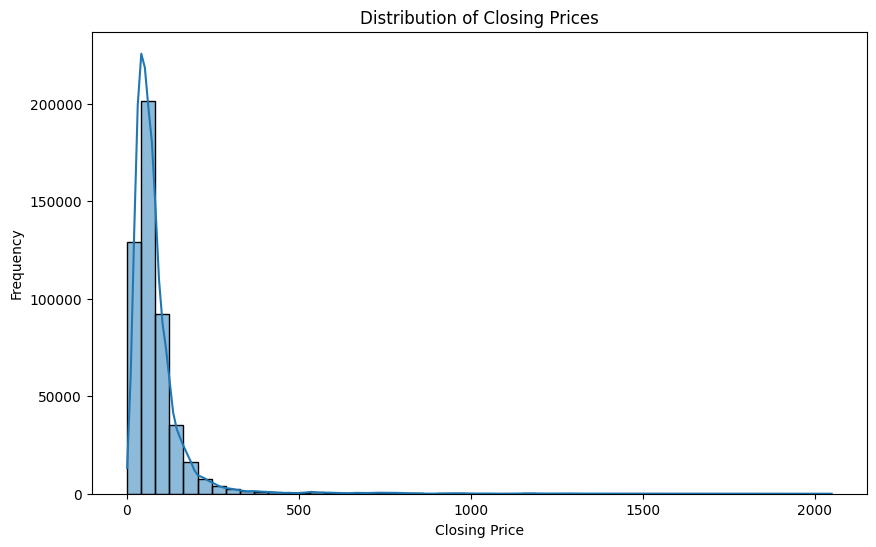

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['close'], kde=True, bins=50) # Added bins for clarity
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# **Interpretation**.


The histogram above shows that the frequency distribution of all recorded daily closing prices across the entire dataset is characteristically highly right-skewed, which means the vast majority of closing prices are clustered in the lower price ranges, likely between 0 and 100 , where the bars are tallest. This distribution also clearly shows that while most stocks trade at lower values, the dataset includes a few significant outliers that trade at much higher price points, leading to a wide total price range

**2. Histogram showing distribution of Opening Price**

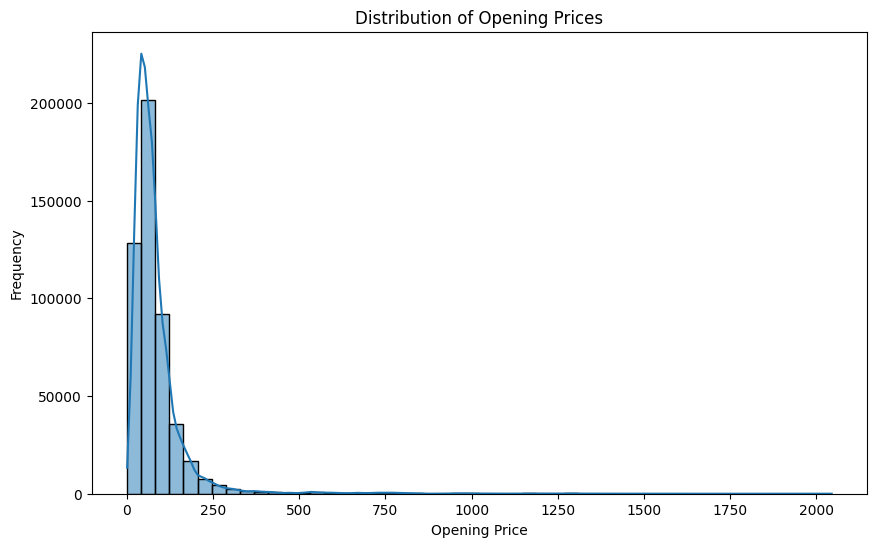

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['open'], kde=True, bins=50)
plt.title('Distribution of Opening Prices')
plt.xlabel('Opening Price')
plt.ylabel('Frequency')
plt.show()

**Interpretation.**

The histogram above indicates that the distribution of all initial daily trading prices in the dataset, much like the closing prices, is strongly right-skewed (positively skewed). This suggests that most stocks in the sample opened at relatively low to moderate price levels, while a small number of trading days recorded exceptionally high opening prices. The long, sparse tail extending to the right reflects these high-value observations, which highlight the presence of a few expensive stocks and underscore the wide variability in price levels across the market.

**3. A box plot of High Prices**

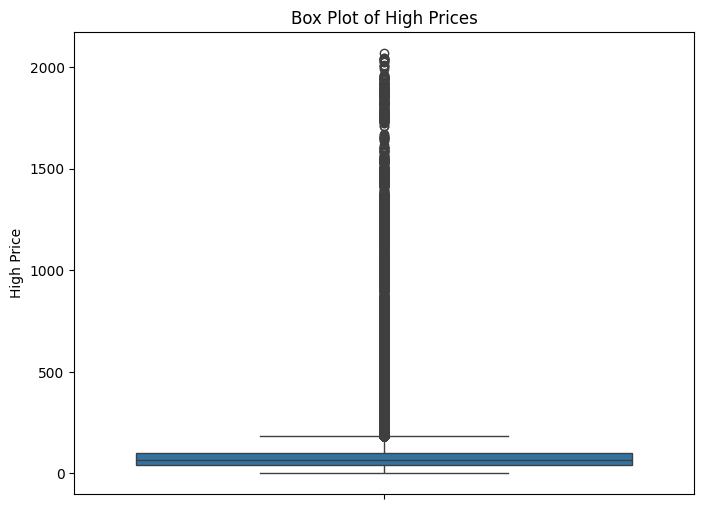

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['high'])
plt.title('Box Plot of High Prices')
plt.ylabel('High Price')
plt.show()

**Interpretation.**


This box plot above shows that the vast majority of daily high prices are clustered at the lower end of the price spectrum, given the very short box and whisker near the bottom (likely below $200). The plot is extremely right-skewed, indicating that while most high prices are low, there are many days, represented by the numerous outliers (the individual dots stretching far up the y-axis), where a small number of stocks traded at exceptionally high values. This distribution confirms that a few expensive stocks drive the upper extreme of the market's daily high price range, making the overall distribution highly concentrated at the lower end with a long, sparse tail of high-priced observations.


**4. A box plot of low prices**

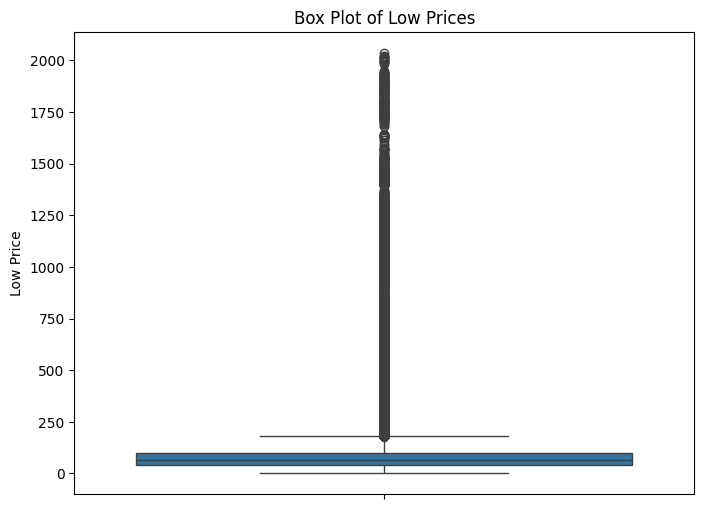

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['low'])
plt.title('Box Plot of Low Prices')
plt.ylabel('Low Price')
plt.show()

**Interpretation.**

This box plot, shows that majority of daily lowest prices are clustered at very low values, as evidenced by the box and lower whisker being compressed near the baseline (likely below $200). Despite this concentration, the plot shows a long, sparse tail of outliers (individual dots) that extend far up the y-axis. These outliers represent the daily low prices of a small subset of highly-priced stocks that trade at significantly higher values than the rest of the market, confirming a broad absolute price range driven by a few high-cost equities.

**5. A Density Plot of Trading Volumes**

/tmp/ipython-input-3533266077.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['volume'], shade=True)


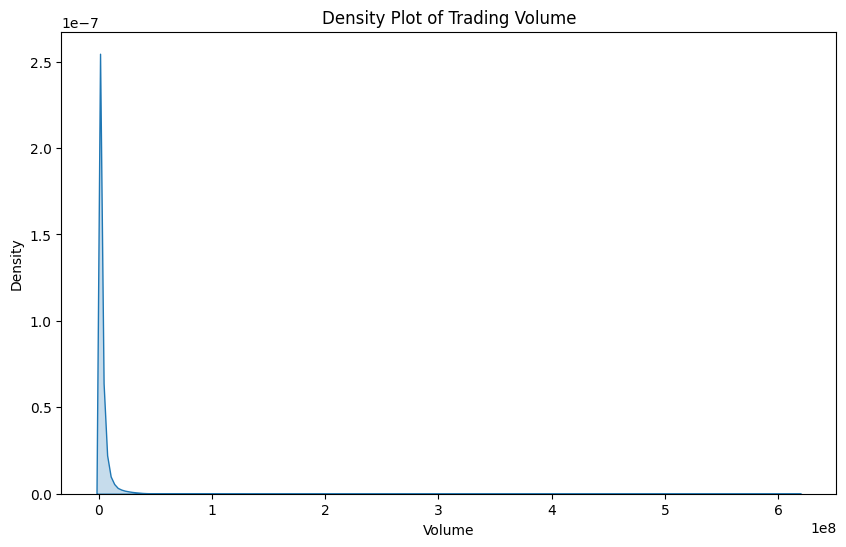

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['volume'], shade=True)
plt.title('Density Plot of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Density')
plt.show()

**Interpretation.**

The Kernel Density Estimate (KDE) plot above shows that is extremely skewed to the right, or positively skewed. The vast majority of trading volumes are heavily concentrated near zero (the initial peak), which indicates that most stock-day observations have a relatively low volume. The distribution then drops off sharply and extends into a very long, low tail to the right. This long tail represents a small fraction of trading days that saw exceptionally high volumes (outliers), such as during high-profile earnings, news events, or large-cap stock trading, confirming that while most days are quiet in terms of volume, there are a few events that lead to massive spikes.

6. **Count plot of symbols**

In [ ]:
data['symbol'].value_counts()

,count
symbol,
YUM,1007
XYL,1007
XRX,1007
XRAY,1007
XOM,1007
...,...
DXC,189
BHGE,126
BHF,117



Based on the data analysis, the distribution of stock symbols in the dataset is highly uneven. The most frequently observed stocks—UM, XYL, XRX, XRAY, XOM, and others each have the maximum possible count of 1007 daily entries, suggesting they were included in the dataset for the full duration of the recorded period. Conversely, the least frequently observed stock, APTV, has only 18 entries, followed closely by DWDP (83), BHF (117), and BHGE (126), indicating these symbols were only tracked for a very short period or were recently added to the sample.

**Total number of unique stock symbols**

In [ ]:
total_symbols = data['symbol'].nunique()
print(f"Total number of unique stock symbols: {total_symbols}")

Total number of unique stock symbols: 505


**Frequency table for symbol**

In [ ]:
# Get the value counts for the 'symbol' column
symbol_counts = data['symbol'].value_counts()

# Calculate the percentage for each symbol
symbol_percentages = symbol_counts / len(data) * 100

# Create a DataFrame to display counts and percentages
symbol_summary = pd.DataFrame({'Count': symbol_counts, 'Percentage': symbol_percentages})

# Display the summary
display(symbol_summary)

,Count,Percentage
symbol,,
YUM,1007,0.202423
XYL,1007,0.202423
XRX,1007,0.202423
XRAY,1007,0.202423
XOM,1007,0.202423
...,...,...
DXC,189,0.037992
BHGE,126,0.025328
BHF,117,0.023519


**7. A bar graph showing the Top 5 and Last 5 Stock Symbols**

/tmp/ipython-input-940467262.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=combined_symbols.index, y=combined_symbols.values, palette='viridis')


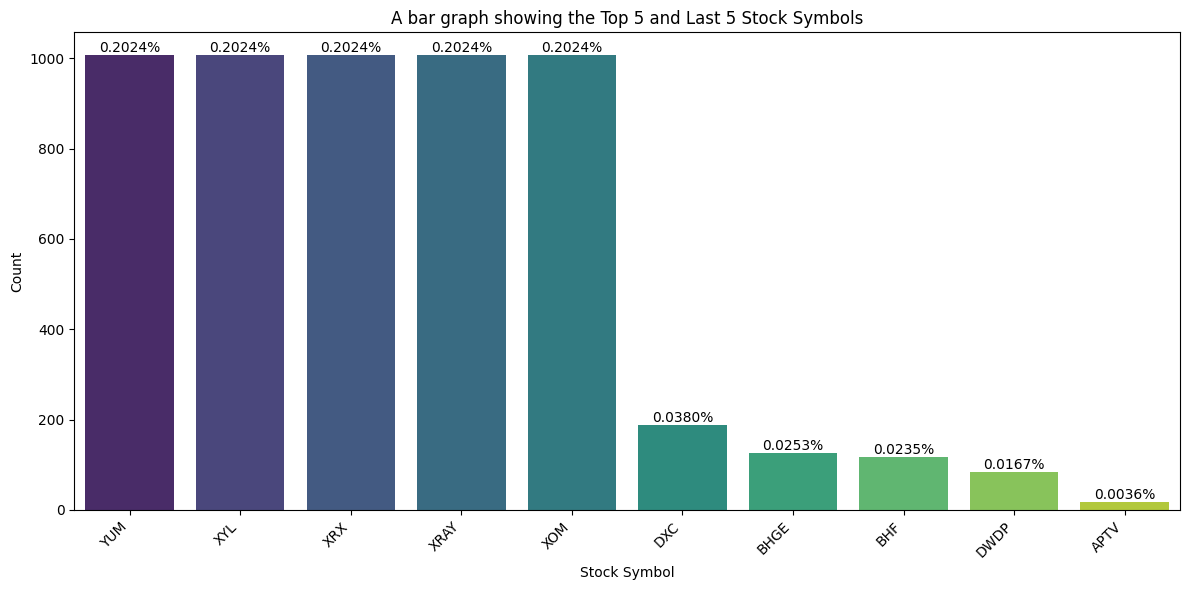

In [ ]:
# Get the value counts for the 'symbol' column
symbol_counts = data['symbol'].value_counts()

# Select the top 5 and last 5 symbols
top_5_symbols = symbol_counts.head(5)
last_5_symbols = symbol_counts.tail(5)

# Concatenate the top 5 and last 5 for plotting
combined_symbols = pd.concat([top_5_symbols, last_5_symbols])

# Calculate the total number of records for the combined symbols
total_combined_count = combined_symbols.sum()

# Create a bar plot of the combined symbol counts
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=combined_symbols.index, y=combined_symbols.values, palette='viridis')
plt.title('A bar graph showing the Top 5 and Last 5 Stock Symbols')
plt.xlabel('Stock Symbol')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

# Add percentages on top of the bars
for p in ax.patches:
    # Calculate percentage relative to the total number of records in the *entire* dataset
    percentage = '{:.4f}%'.format(100 * p.get_height() / len(data))
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)


plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

**Interpretation.**

The bar graph above illustrates a clear discrepancy in tracking duration across the stock symbols in the dataset, with a core group of stocks monitored consistently throughout the entire period, while others were tracked for only a brief duration. Specifically, the top five symbols (YUM, XYL, XRX, XRAY, and XOM) each account for 0.2024% of the total tracking duration, whereas the least tracked stock, APTV, represents only 0.0036%. Similarly, DWDP was tracked for just 0.0167% of the total duration. This uneven distribution highlights the need to account for significant differences in data availability when conducting any comparative analysis, as the lower-ranked symbols reflect a much narrower observation window compared to the consistently tracked top symbols.

**8. Correlation between numerical features**.

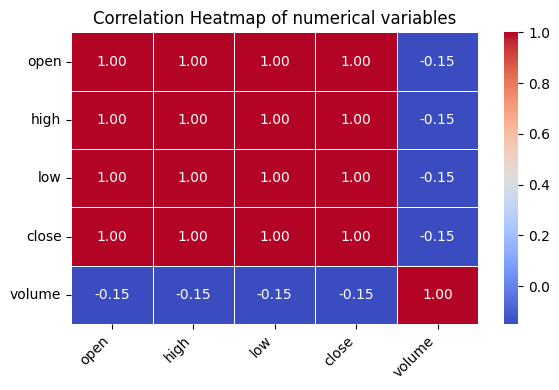

In [ ]:
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap
# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of numerical variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()


**Interpretation.**

The correlation heatmap above shows extremely strong positive linear relationships among the price metrics and virtually no linear relationship involving volume. Specifically, Open, High, Low, and Close prices are all almost perfectly correlated with each other, with correlation coefficients ranging of 1.00. This is because the stock's opening price, high price, low price, and closing price on a single day typically move in near-perfect lockstep. In sharp contrast, the Volume variable shows a very weak negative correlation coefficient close to -0.15 with all four price variables (Open, High, Low, and Close), indicating that the absolute level of a stock's price is not linearly related to the amount of trading activity (volume) it generates.

# **Task 3: Basic Data Visualization**

**1. A scatter plot showing the relationship between Opening and Closing prices.**

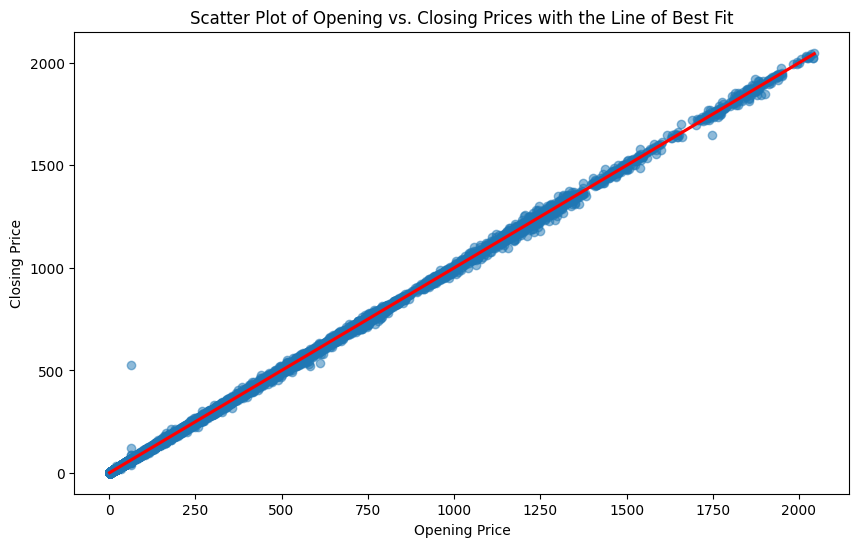

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=data['open'], y=data['close'], scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot of Opening vs. Closing Prices with the Line of Best Fit')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.show()

**Interpretation.**

The scatter plot above of Opening Price vs. Closing Price exhibits an extremely strong positive linear relationship, with nearly all data points clustering tightly around the diagonal line of best fit, confirming a near-perfect correlation (close to 1.000). This indicates that a stock's opening price is an almost flawless predictor of its closing price. The minor deviations from the line represent the small, net daily price movement, where points slightly above the line show days the stock closed higher than it opened (up days), and points slightly below show days it closed lower (down days), all while the overall price distribution remains heavily right-skewed toward lower values.


**2. A bar graph showing Total Volume by Stock Symbol (Top 20)**

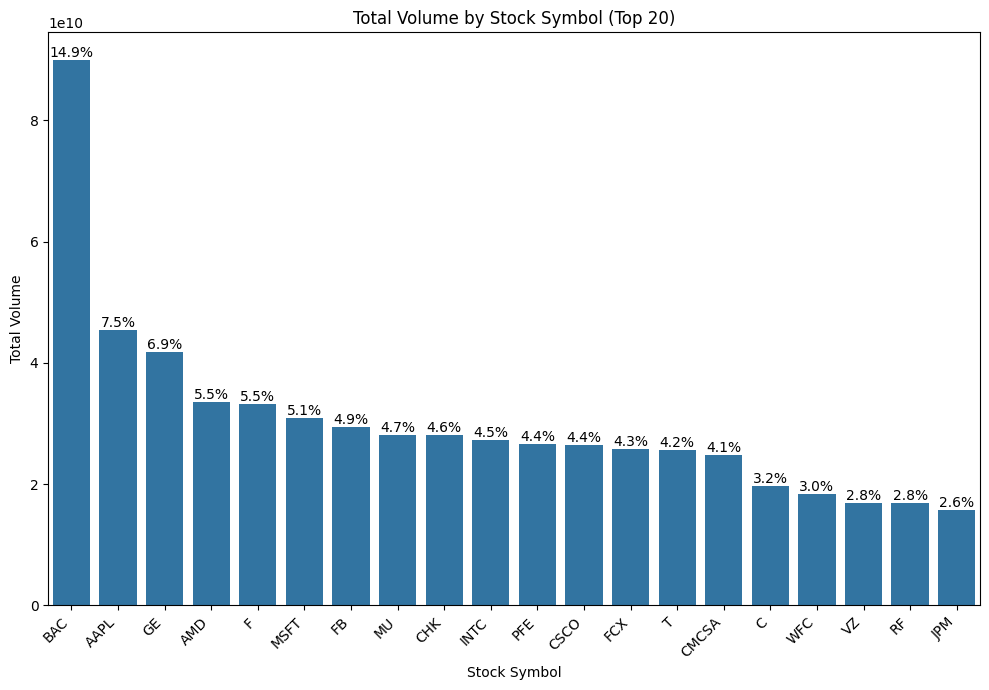

In [ ]:
# Calculate total volume for each symbol
volume_by_symbol = data.groupby('symbol')['volume'].sum().sort_values(ascending=False)

# Select the top N symbols for better visualization (e.g., top 20)
top_n = 20
top_volume_by_symbol = volume_by_symbol.head(top_n)

# Calculate the total volume of the top N symbols for percentage calculation
total_top_volume = top_volume_by_symbol.sum()

# Create a bar plot
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=top_volume_by_symbol.index, y=top_volume_by_symbol.values)
plt.title(f'Total Volume by Stock Symbol (Top {top_n})')
plt.xlabel('Stock Symbol')
plt.ylabel('Total Volume')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

# Add percentages on top of the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_top_volume)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

**Interpretation.**

The bar graph above illustrates the total trading volume for the top 20 symbols in the dataset, revealing a strong concentration of trading activity among a few stocks. BAC recorded the highest total volume at 14.9%, followed by AAPL at 7.5% and GE at 6.9%. In contrast, JPM registered the lowest trading volume among the top 20 symbols at 2.6%. This distribution highlights a significant imbalance in market activity, with a small number of stocks dominating overall trading volumes

**3. A box plot showing comparison of High and Low Stock Prices**

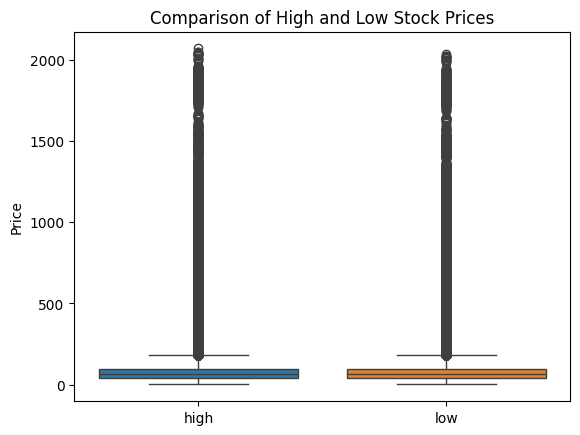

In [ ]:
sns.boxplot(data[['high', 'low']])
plt.title('Comparison of High and Low Stock Prices')
plt.ylabel('Price')
plt.show()

**Interpretation.**


The box plot above shows that both distributions are virtually identical and extremely right-skewed. The boxes and whiskers for both high and low prices are heavily compressed near the lower end of the price scale, indicating that the median and interquartile range (middle 50%) for both metrics are very similar and concentrated at low price levels (likely below $200). The most defining feature for both is the presence of a long, identical tail of outliers stretching up the vertical axis, confirming that a small number of days for very high-priced stocks drives the extreme maximum values, while the vast majority of all price observations are clustered at the low end.


# **LEVEL 2 (INTERMEDIATE)**

# **Task 1: Regression Analysis**

In [ ]:
#  Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
# Define features (X) and target (y)
X = data[['low']]     # independent variable
y = data['high']      # dependent variable

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(" Regression Results")
print("----------------------")
print(f"Intercept (β₀): {model.intercept_:.4f}")
print(f"Coefficient (β₁): {model.coef_[0]:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

 Regression Results
----------------------
Intercept (β₀): 0.1133
Coefficient (β₁): 1.0171
R-squared: 0.9998
Mean Squared Error (MSE): 1.9478


**Interpretation.**

From the regression results above, the R
2
  value of 0.9998 is exceptionally high, meaning that approximately 99.98% of the variation in the Closing Price is explained by the Opening Price, suggesting the model is nearly perfect. The Coefficient (β
1
​
 ) of 1.0171 shows that, on average, for every $1 increase in the Opening Price, the Closing Price increases by approximately $1.0171. The Intercept (β
0
​
 ) of 0.1133 suggests that if the opening price were zero, the predicted closing price would be $0.1133. Finally, the Mean Squared Error (MSE) of 1.9478 is very low relative to the price scale, quantifying the small average squared difference between the actual closing prices and the prices predicted by this highly accurate model.

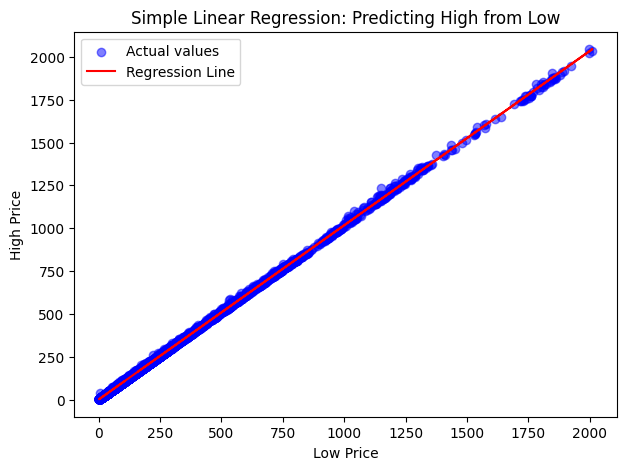

In [ ]:
#  Visualization
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, color='blue', label='Actual values', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel("Low Price")
plt.ylabel("High Price")
plt.title("Simple Linear Regression: Predicting High from Low")
plt.legend()
plt.show()

**Interpretation**.

The above scatter plot and its regression line, which model High Price as a function of Low Price, show an almost perfect positive linear relationship. The data points cluster extremely tightly along the line of best fit, visually confirming the near-perfect correlation (close to 1.000) between the daily low price and the daily high price. The line itself is nearly the 45 degrees line, indicating that the high price on any given day is, for the vast majority of observations, almost identical to the low price, with the small vertical distance between the point and the line representing the minor daily price range or volatility. Overall distribution is severely right-skewed due to a few very high-priced stock observation

# **Task 2: Time Series Analysis**

In [ ]:
# Sort the data by date without modifying the original DataFrame
data_sorted_by_date = data.sort_values(by='date')

# Display the first few rows of the sorted DataFrame to verify
display(data_sorted_by_date.head())

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.07,25.82,25.060,25.36,8998943.0
330,NVDA,2014-01-02,15.92,15.98,15.720,15.86,6502296.0
329,NUE,2014-01-02,53.29,53.38,52.510,52.73,1611326.0
328,NTRS,2014-01-02,61.76,61.95,60.665,60.89,1011050.0
327,NTAP,2014-01-02,41.01,41.01,40.415,40.42,2427140.0


In [ ]:
# Set 'date' as index
data_sorted_by_date.set_index('date', inplace=True)


In [ ]:
data_sorted_by_date

,symbol,open,high,low,close,volume
date,,,,,,
2014-01-02,AAL,25.07,25.82,25.060,25.36,8998943.0
2014-01-02,NVDA,15.92,15.98,15.720,15.86,6502296.0
2014-01-02,NUE,53.29,53.38,52.510,52.73,1611326.0
2014-01-02,NTRS,61.76,61.95,60.665,60.89,1011050.0
2014-01-02,NTAP,41.01,41.01,40.415,40.42,2427140.0
...,...,...,...,...,...,...
2017-12-29,EMR,70.04,70.21,69.690,69.69,1848874.0
2017-12-29,EMN,93.71,93.76,92.550,92.64,632351.0
2017-12-29,EL,127.80,128.13,127.200,127.24,805149.0


In [ ]:
# Select a single stock (ADP) for time series analysis
adp_data = data[data['symbol'] == 'ADP'].copy()

In [ ]:
# Convert the 'date' column to datetime objects
adp_data['date'] = pd.to_datetime(adp_data['date'])

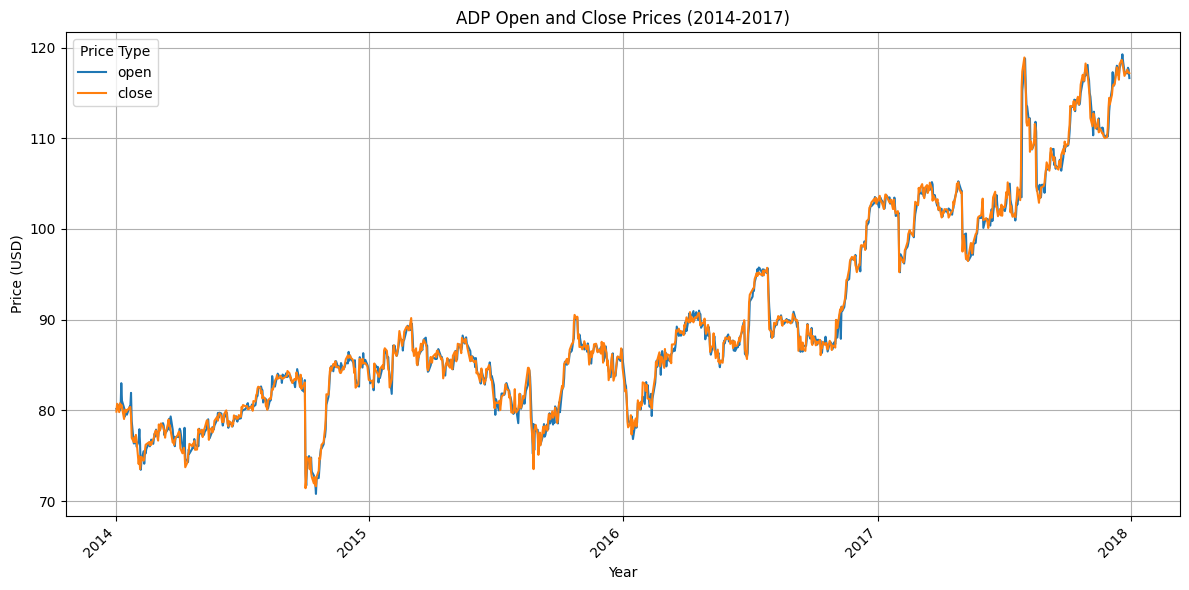

In [ ]:
# Select both 'open' and 'close' prices
adp_ts = adp_data.set_index('date')[['open', 'close']]

# --- Plotting Code ---
plt.figure(figsize=(12, 6))

# Plot the DataFrame with both columns
adp_data_indexed = adp_data.set_index('date') # Set index and store in a variable
adp_data_indexed[['open', 'close']].plot(ax=plt.gca()) # Plot on the indexed DataFrame

plt.title('ADP Open and Close Prices (2014-2017)')
plt.xlabel('Year')
plt.ylabel('Price (USD)')

# Set major ticks every year
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())

# FORMATTER CHANGE: Use %Y for four-digit year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.legend(title='Price Type')
plt.tight_layout()
plt.show()

**Interpretation.**

The time series graph for ADP’s open and close prices from 2014 to 2017 above shows a clear upward trend, indicating a consistent increase in the stock’s value over the four-year period. Both the opening and closing prices closely follow each other, with minimal gaps, suggesting relatively stable intraday price movements. The stock experienced short-term fluctuations and periodic dips, particularly around mid-2014 and mid-2015, but these were followed by strong recoveries. From late 2016 onward, there is a noticeable acceleration in price growth, with the stock reaching its highest levels by the end of 2017. Overall, the trend reflects sustained investor confidence and positive market performance for ADP during this period.

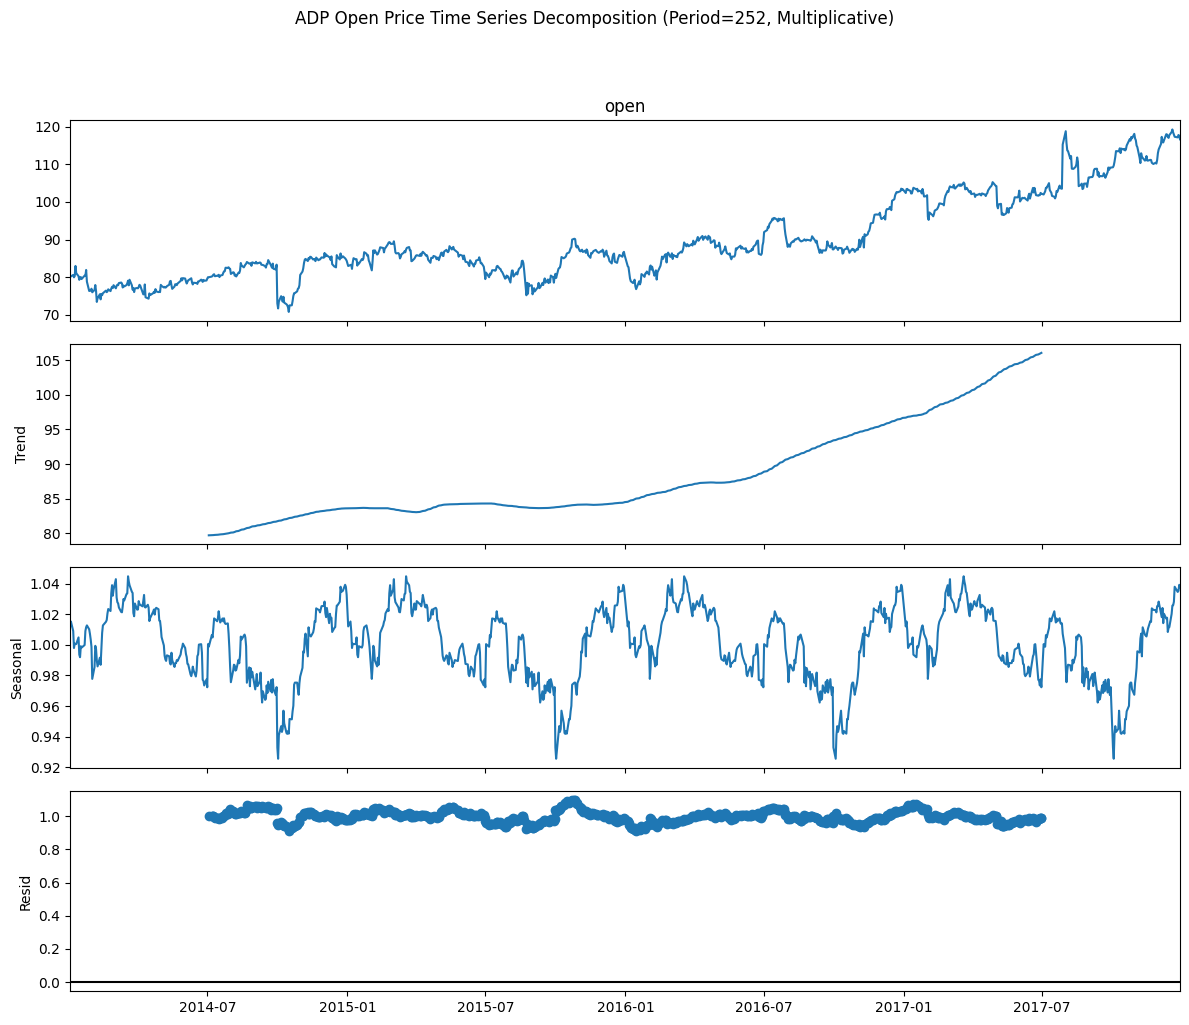

In [ ]:
adp_ts = adp_data.set_index('date')['open']

# Set frequency and drop NaNs introduced by re-indexing (essential for statsmodels)
adp_ts = adp_ts.asfreq('B').dropna()

# --- 2. Decompose the Series ---
# Model: 'multiplicative' (fluctuations grow with price)
# Period: 252 (annual seasonality for daily trading data)
decomposition = seasonal_decompose(
    adp_ts,
    model='multiplicative',
    period=252
)

# --- 3. Plot the Decomposition ---
fig = decomposition.plot()
fig.set_size_inches(12, 10)
fig.suptitle(
    'ADP Open Price Time Series Decomposition (Period=252, Multiplicative)',
    y=1.02
)
plt.tight_layout(rect=[0, 0, 1, 0.98])

**Interpretation.**

The time series decomposition of ADP’s open price (Period = 252, Multiplicative) above reveals four key components. The observed series shows a steady upward movement in open prices from 2014 to 2017, indicating overall growth. The trend component confirms this, with a smooth and consistent increase over time, reflecting a long-term bullish trajectory in the stock’s performance. The seasonal component exhibits regular, repeating fluctuations around the trend line, suggesting that ADP’s stock prices experience predictable seasonal patterns within a yearly cycle. The residual component remains relatively stable and close to 1, indicating that random variations are minimal and do not significantly deviate from the trend and seasonal patterns. Overall, the decomposition highlights a strong upward trend, stable seasonality, and limited irregular volatility, making the stock’s behavior relatively predictable over this period.


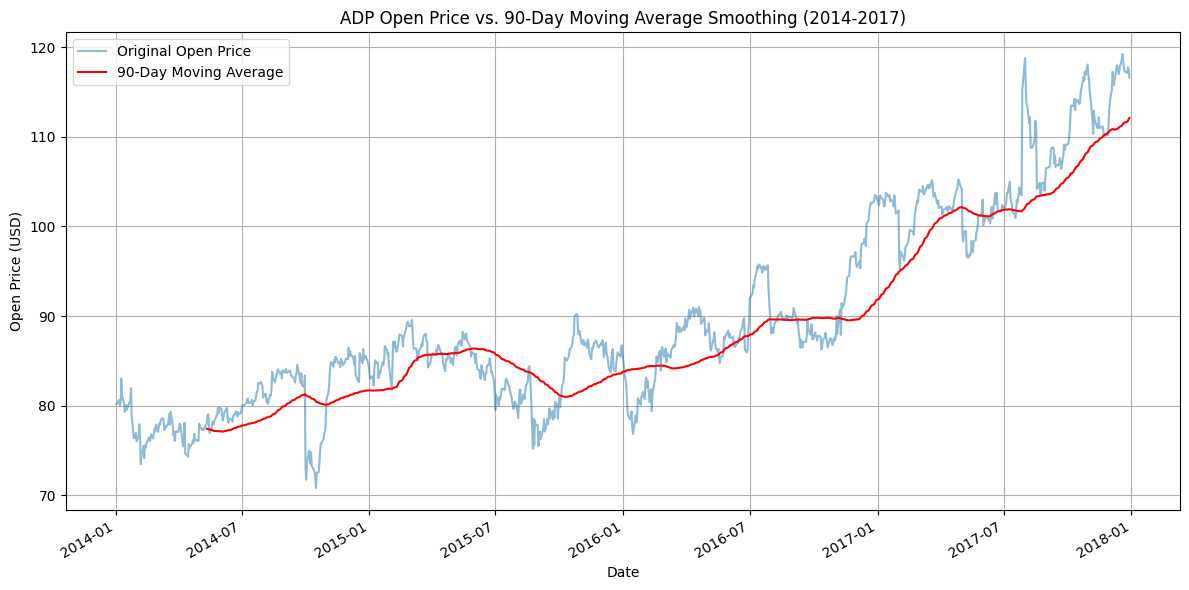

In [ ]:
# --- 2. Calculate the Moving Average ---
window_size = 90 # 90-day MA
adp_ma_open = adp_ts.rolling(window=window_size).mean()

# --- 3. Plot the Original and Smoothed Series ---
plt.figure(figsize=(12, 6))
adp_ts.plot(label='Original Open Price', alpha=0.5)
adp_ma_open.plot(label=f'{window_size}-Day Moving Average', color='red')
plt.title(f'ADP Open Price vs. {window_size}-Day Moving Average Smoothing (2014-2017)')
plt.xlabel('Date')
plt.ylabel('Open Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation.**

The graph above shows that the original open price (light blue) exhibits frequent short-term fluctuations and volatility, reflecting daily market movements. In contrast, the 90-day moving average (red line) smooths out these fluctuations, highlighting a clear upward trend over the four-year period. The curve shows moderate growth between 2014 and 2016, followed by a sharper and more sustained increase in prices throughout 2017. This indicates that despite temporary dips, ADP’s stock maintained strong long-term growth, and the moving average effectively captures the overall direction of the trend while filtering out short-term noise.